CV_L2_Agumentation
===
---

데이터를 몇 만 장씩 구축하는데는 많은 비용과 시간이 필요하다. 제한된 데이터셋을 최대한 활용하기 위해서 augmentation이라는 방법을 사용할 수 있다. 어떻게 사용하는 것이며 어떤 효과를 줄 수 있을까?



# 3-2. 데이터셋의 현실

### 1) 대량의 데이터셋 구축비용
---
1장당 10원이라고 해도 1400만장을 얻으려면 1억이 넘는 비용이 필요

### 2) 직접 구축하는 데이터셋
---
모으기가 쉽지 않음


# 3-3. Data Augmentation이란? (1)개요

`Data agumentation` : 갖고 있는 데이터셋을 여러 가지 방법으로 증강시켜(augment) 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법

효과 : 데이터가 많아진다는 것은 과적합(overfitting)을 줄일 수 있다는 것을 의미한다. 또한 우리가 가지고 있는 데이터셋이 실제 상황에서의 입력값과 다를 경우, augmentation을 통해서 실제 입력값과 비슷한 데이터 분포를 만들어 낼 수 있다.

### 이미지 데이터 agumentation
---
예시1.
모델이 다양한 색상의 사진을 학습하게 하기 위해서 우리가 인스타그램에 업로드할 때 쓰는 색상 필터들을 적용

예시2.
좌우 대칭이나 상하 반전과 같이 이미지의 공간적 배치를 조작

# 3-4. Data Augmentation이란? (2) 다양한 Image Augmentation 방법




**Flipping**
- 이미지를 대칭하는 기능
- 물체 탐지(detection), 세그멘테이션(segmentation) 문제 등 정확한 정답 영역이 존재하는 문제에 적용할 때에는 라벨도 같이 좌우 반전을 해주어야 함

**Gray scale**
- 3가지 채널(channel)을 가진 RGB 이미지를 하나의 채널을 가지도록 해준다.
- RGB 각각의 채널마다 가중치(weight)를 주어 가중합(weighted sum)을 하였다.
- 사용된 가중치의 경우 합이 1이 됨을 알 수 있다.

**Saturation**
- RGB 이미지를 HSV(Hue(색조), Saturation(채도), Value(명도)의 3가지 성분으로 색을 표현) 이미지로 변경한다.
- S(saturation) 채널에 오프셋(offset)을 적용, 조금 더 이미지를 선명하게 만들어준다.
- 이후 다시 우리가 사용하는 RGB 색상 모델로 변경을 해준다.

**Brightness**
- 밝기를 조절한다.
- RGB에서 (255,255,255)는 흰색을, (0,0,0)은 검은색을 의미한다.
-  RGB 채널에서 값을 더해주면 밝아지고, 빼주면 어두워진다.

**Rotation**
- 이미지의 각도를 변환해준다.
- 90도 단위로 돌리지 않는 경우 직사각형 형태에서 기존 이미지로 채우지 못하는 영역을 어떻게 처리해야 할지 유의해야한다.

**Center Crop**
- 이미지의 중앙을 기준으로 확대하는 방법이다.
- 너무 작게 center crop을 할 경우 본래 가진 라벨과 맞지 않게 되는 상황이 발생할 수 있으니 주의가 필요

이외에 Gaussian noise, Contrast change, Sharpen, Affine transformation, Padding, Blurring 등이 존재한다.


# 3-5. 텐서플로우를 사용한 Image Augmentation (1) Flip

- `flip_left_right`와 `flip_up_down` 두 가지로 좌우와 상하 반전으로 구분된다.
- 확률적으로 적용되게 하는 것이 `random_flip_left_right`와 `random_flip_up_down`이다.


In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/home/aiffel-dj63/aiffel/data_augmentation/images/mycat.jpg'

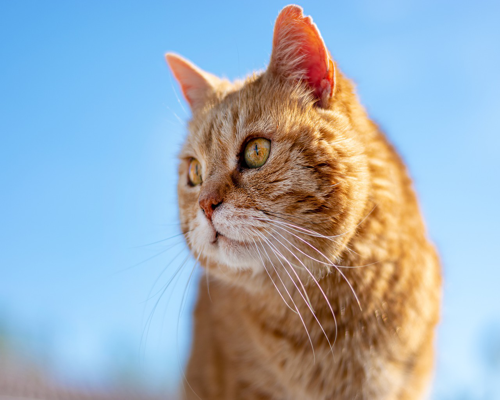

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

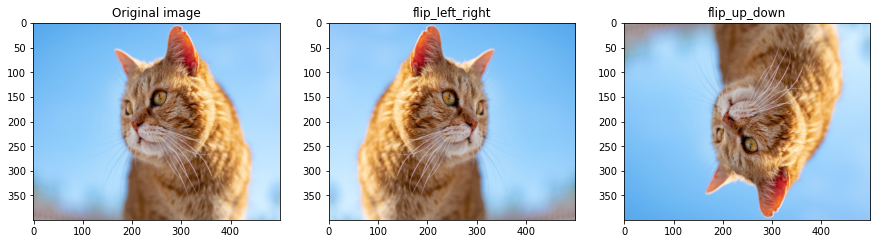

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

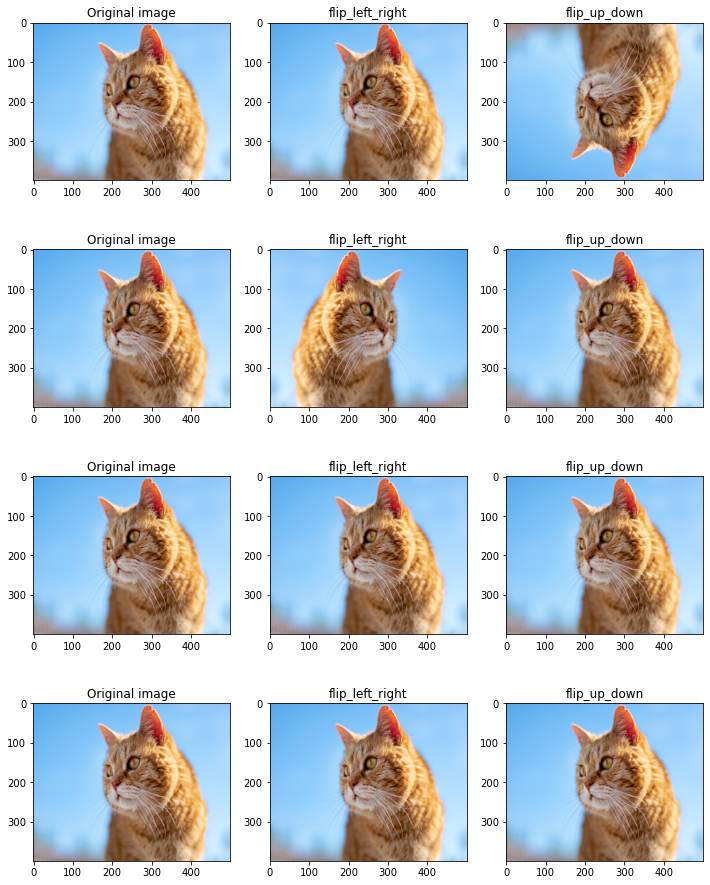

In [4]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

# 3-6. 텐서플로우를 사용한 Image Augmentation (2) Center Crop

`central_fraction` : 얼마나 확대를 할지를 조절하는 매개변수이다.

하지만 위의 함수는 텐서플로우 모듈에서 기본적으로 제공되지 않기 때문에 파이썬의 random 모듈을 사용하셔도 되고 텐서플로우의 랜덤 모듈을 사용해야 한다.



In [5]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]

<Figure size 864x1080 with 0 Axes>

In [6]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

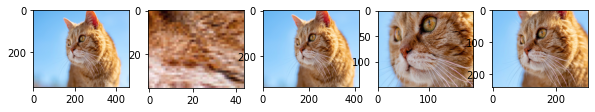

In [7]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

# 3-7. 텐서플로우를 사용한 Image Augmentation (3) 직접 해보기

`tf.image.random_crop()`와 `tf.image.random_brightness()`

### tf.image.random_crop()
---


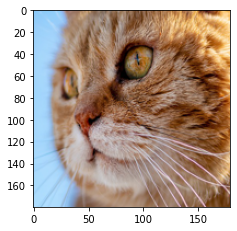

In [8]:
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.subplot(1,3,1)
plt.imshow(random_crop_image)

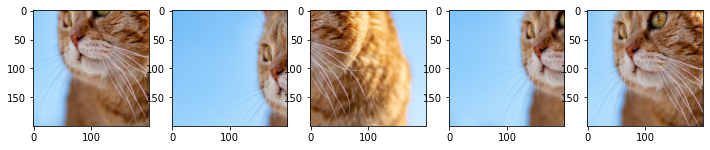

In [9]:
plt.figure(figsize=(12, 15))

for i in range(5):
    random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
    random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
    plt.subplot(1,5,i+1)
    plt.imshow(random_crop_image)

### tf.image.random_brightness()
---

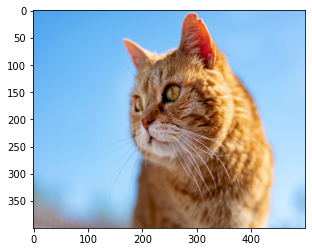

In [10]:
random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)
plt.imshow(random_bright_image)

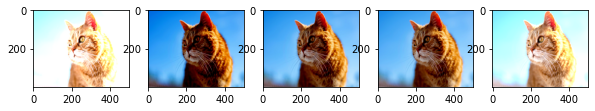

In [11]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)

# 3-8. imgaug 라이브러리


### imgaug 라이브러리 사용하기
---
이미지에 augmentation을 적용할 때는 정답(ground truth 또는 gt)이 되는 데이터에도 augmentation이 동일하게 적용이 되어야한다.

imgaug에서는 배열을 이미지의 기본 형태로 사용합니다. 따라서 PIL Image 데이터형을 넘파이(numpy) 배열로 변환하여 사용하도록 한다.



In [12]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)


### augmentation 기법 사용해 보기
---
imgaug.augmenters의 Affine()은 아핀 변환(Affine transform)을 이미지에 적용

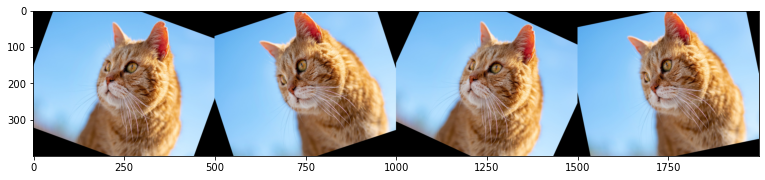

In [13]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate = iaa.Affine(rotate=(-25, 25))
images_aug = rotate(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

**iaa.Crop()**

텐서플로우 API로 사용했던 crop 기법을 적용 Crop 하려는 원본 이미지의 비율을 매개변수로 사용하여 이미지를 생성

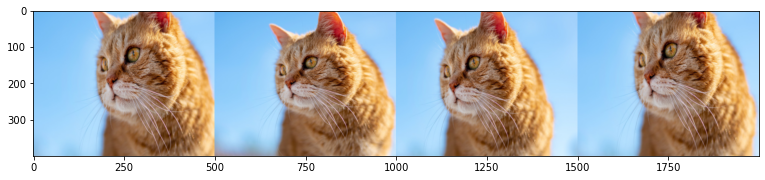

In [14]:
images = [image_arr, image_arr, image_arr, image_arr]
crop = iaa.Crop(percent=(0, 0.2))
images_aug = crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

**iaa.Sequential()**

imgaug에서는 iaa.Sequential를 사용해서 여러 가지의 augmentation 기법을 순차적으로 적용할 수 있습니다. 아래 코드에서는 위에서 사용한 rotate와 crop이 적용된 결과를 볼 수 있다.


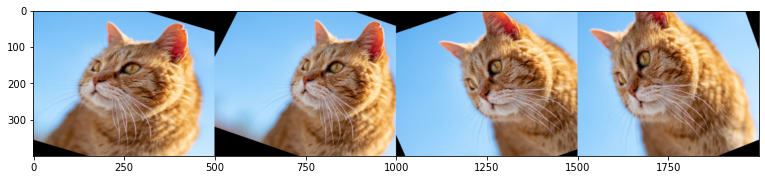

In [15]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

`iaa.Sequential()`의 augmentation 순서는 위 코드처럼 사용하면 고정되지만 random으로 기법들의 순서를 바꾸어 사용할 수 있도록 지원하도록 코드 짜보도록 하자.

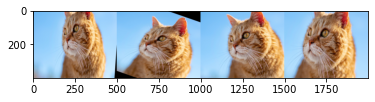

In [16]:
images = [image_arr, image_arr, image_arr, image_arr]
rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)
plt.imshow(np.hstack(images_aug))

`iaa.OneOf()`를 사용하면 여러 augmentation 기법들 중 하나를 선택하도록 할 수 있다.

In [ ]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)
plt.figure(figsize=(13,13))
plt.imshow(np.hstack(images_aug))

`imgaug`는 augmentation들이 일정 확률로 선택이 되게 하는 기능을 제공한다. 

iaa.Sometimes()는 위의 iaa.OneOf()처럼 사용할 수 있다. 

iaa.AddToSaturation()을 0.6의 확률로, iaa.Grayscale()를 0.2의 확률로 적용하는 augmentation 함수를 구현하고 결과를 시각화해보자.

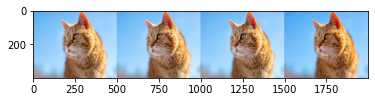

In [17]:
images = [image_arr, image_arr, image_arr, image_arr]
seq = iaa.Sequential([
     iaa.Sometimes(
         0.6,
         iaa.AddToSaturation((-50, 50))
     ),
     iaa.Sometimes(
         0.2,
         iaa.Grayscale(alpha=(0.0, 1.0))
     )
])
images_aug = seq(images=images)
plt.imshow(np.hstack(images_aug))


개와 고양이를 분류하는 모델을 만든다고 가정하고 직접 복잡한 augmentation을 만들어 보자.

이 때 조합될 수 있는 가짓수는 1024가지가 넘도록 해야한다. 시각화는 100장을 하도록 하자.

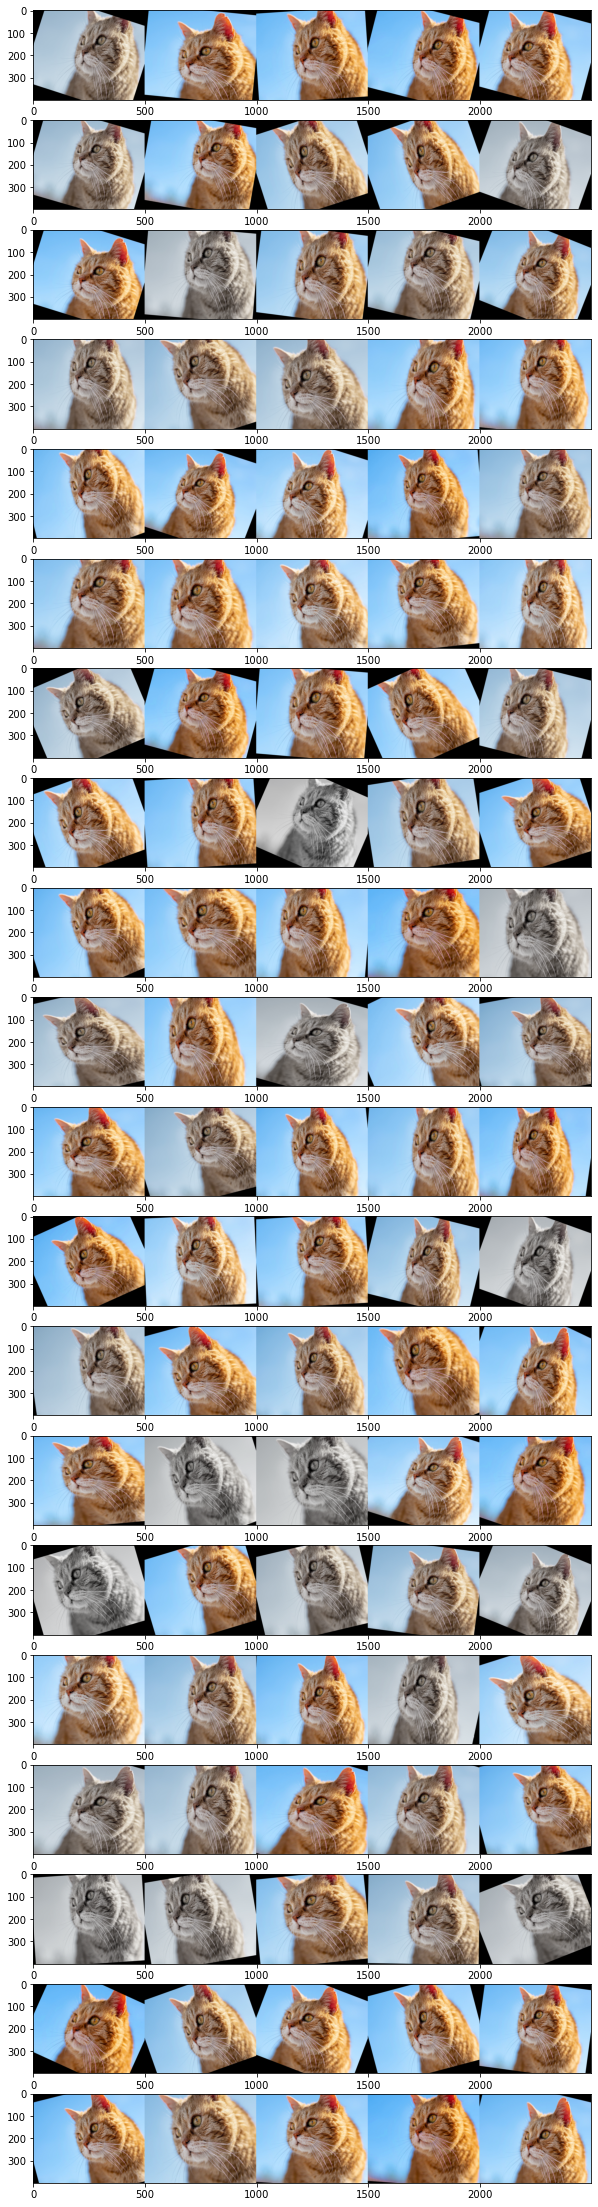

In [18]:
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(10, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))

plt.show()

# 3-9. 더 나아간 기법들

GAN을 Data augmentation에 활용가능하다.

[The Effectiveness of Data Augmentation in Image Classification using Deep Learning](http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf)